In [12]:
import torch

x = torch.empty(5, 3)
x = torch.rand(5, 3)
x = torch.zeros(5, 3, dtype = torch.long)
x = torch.tensor([5.5, 3])
x.new_ones(5, 3, dtype = torch.double)
torch.randn_like(x, dtype = torch.float)

x = torch.tensor([[1.0, 1.0], [2.0, 2.0]], requires_grad = True)
print(x)

y = x + 2
print(y)

z = y * y * 3
print(z)

out = z.mean()
print(out)

gradient = torch.tensor([[1.0, 1.0], [1.0, 1.0]])
out.backward()
print(x.grad)

print(y.grad)
print(z.grad)
print(out.grad)

#z.backward(gradient)
#print(z.grad)

tensor([[1., 1.],
        [2., 2.]], requires_grad=True)
tensor([[3., 3.],
        [4., 4.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [48., 48.]], grad_fn=<MulBackward0>)
tensor(37.5000, grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [6.0000, 6.0000]])
None
None
None


C:\user\default\AppData\Local\Temp/ipykernel_11388/3716856177.py:26: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print(y.grad)
C:\user\default\AppData\Local\Temp/ipykernel_11388/3716856177.py:27: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  print(z.grad)
C:\user\

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        #1 input image channel, 6 output channels, 5x5 square convolution
        #kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

#获取模型中的可学习参数
params = list(net.parameters())
#net.parameters()函数来获取模型中可学习的参数
print(len(params))#具有的可学习参数的层数
print(params[0].size()) #conv1的参数

#进行前向传播
input = torch.randn(1,1,32,32)# 四个维度分别为 (N,C,H,W)
out = net(input)#自动调用forward函数计算并返回结果
print(out)


#清空梯度缓存并计算所有需要求导的参数的梯度
net.zero_grad()
out.backward(torch.randn(1,10))

#计算损失函数，一般接收一对数据(output, target),计算两者之间的距离
output = net(input)
target = torch.randn(10)
target = target.view(1,-1) # 令target和output的shape相同.
criterion = nn.MSELoss()#选择计算损失函数方法
loss = criterion(output, target)
print(loss)

#用.grad_fn属性, 可以看到关于loss的计算图
print(loss.grad_fn)
# 当调用loss.backward()时, 就会计算出所有(requires_grad=True的)参数关于loss的梯度, 并且这些参数都将具有.grad属性来获得计算好的梯度

#手动更新参数
learning_rate = 0.001
for f in net.parameters():
    f.data.sub_(learning_rate*f.grad.data)

#利用优化器自动更新梯度
#SGD、Adam算法等
optimizer = optim.SGD(net.parameters(), lr=0.01) # 创建优化器
optimizer.zero_grad() # 清空缓存
output = net(input)
loss = criterion(output, target)
loss.backward() # 计算梯度
optimizer.step() # 执行一次更新


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
10
torch.Size([6, 1, 5, 5])
tensor([[-0.0442, -0.0477, -0.0663, -0.0881, -0.0106,  0.0329,  0.0919,  0.0343,
         -0.1265,  0.0292]], grad_fn=<AddmmBackward>)
tensor(0.9645, grad_fn=<MseLossBackward>)


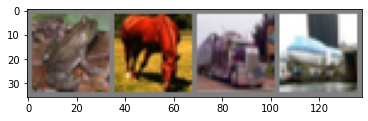

 frog horse truck plane


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

#torchvision的输出类型是 PILImage，转换为Tensor并进行归一化
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./dataset', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


# 类别信息基本情况
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#查看训练图片样本
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

if __name__ == '__main__':
    #得到一些随机训练图片
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    #展示图片
    imshow(torchvision.utils.make_grid(images))
    #打印标签
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [2]:
#定义卷积神经网络
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

#定义损失函数
#损失函数使用交叉熵，优化器使用带动量的SGD
#import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

#训练模型
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader, 0):
        input, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(input)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("train Finished!")

D:\BaiduNetdiskDownload\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.159
[1,  4000] loss: 1.881
[1,  6000] loss: 1.689
[1,  8000] loss: 1.616
[1, 10000] loss: 1.546
[1, 12000] loss: 1.508
[2,  2000] loss: 1.443
[2,  4000] loss: 1.410
[2,  6000] loss: 1.379
[2,  8000] loss: 1.370
[2, 10000] loss: 1.325
[2, 12000] loss: 1.336
train Finished!


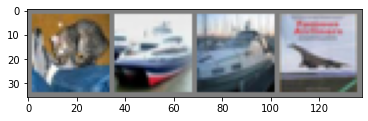

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 52 %
Accuracy of plane : 47 %
Accuracy of   car : 58 %
Accuracy of  bird : 39 %
Accuracy of   cat : 20 %
Accuracy of  deer : 51 %
Accuracy of   dog : 69 %
Accuracy of  frog : 58 %
Accuracy of horse : 58 %
Accuracy of  ship : 73 %
Accuracy of truck : 51 %


In [3]:
#保存模型
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#测试模型
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH))

# 获取少量图片的预测结果
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# 在整个验证集上验证模型结果
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# 查看每一类的预测结果
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

# GPU上训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)